In [1]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

plt.rcParams['figure.dpi'] = 300
sns.set_theme(font_scale = 0.75)
sns.set_style('whitegrid')


df = pd.read_csv('./data/housing.csv')
X = df.loc[:, ['MedInc', 'Latitude', 'Longitude']]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [5]:
kmeans = KMeans(n_clusters = 6)
X['Cluster'] = kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,3
1,8.3014,37.86,-122.22,3
2,7.2574,37.85,-122.24,3
3,5.6431,37.85,-122.25,3
4,3.8462,37.85,-122.25,2


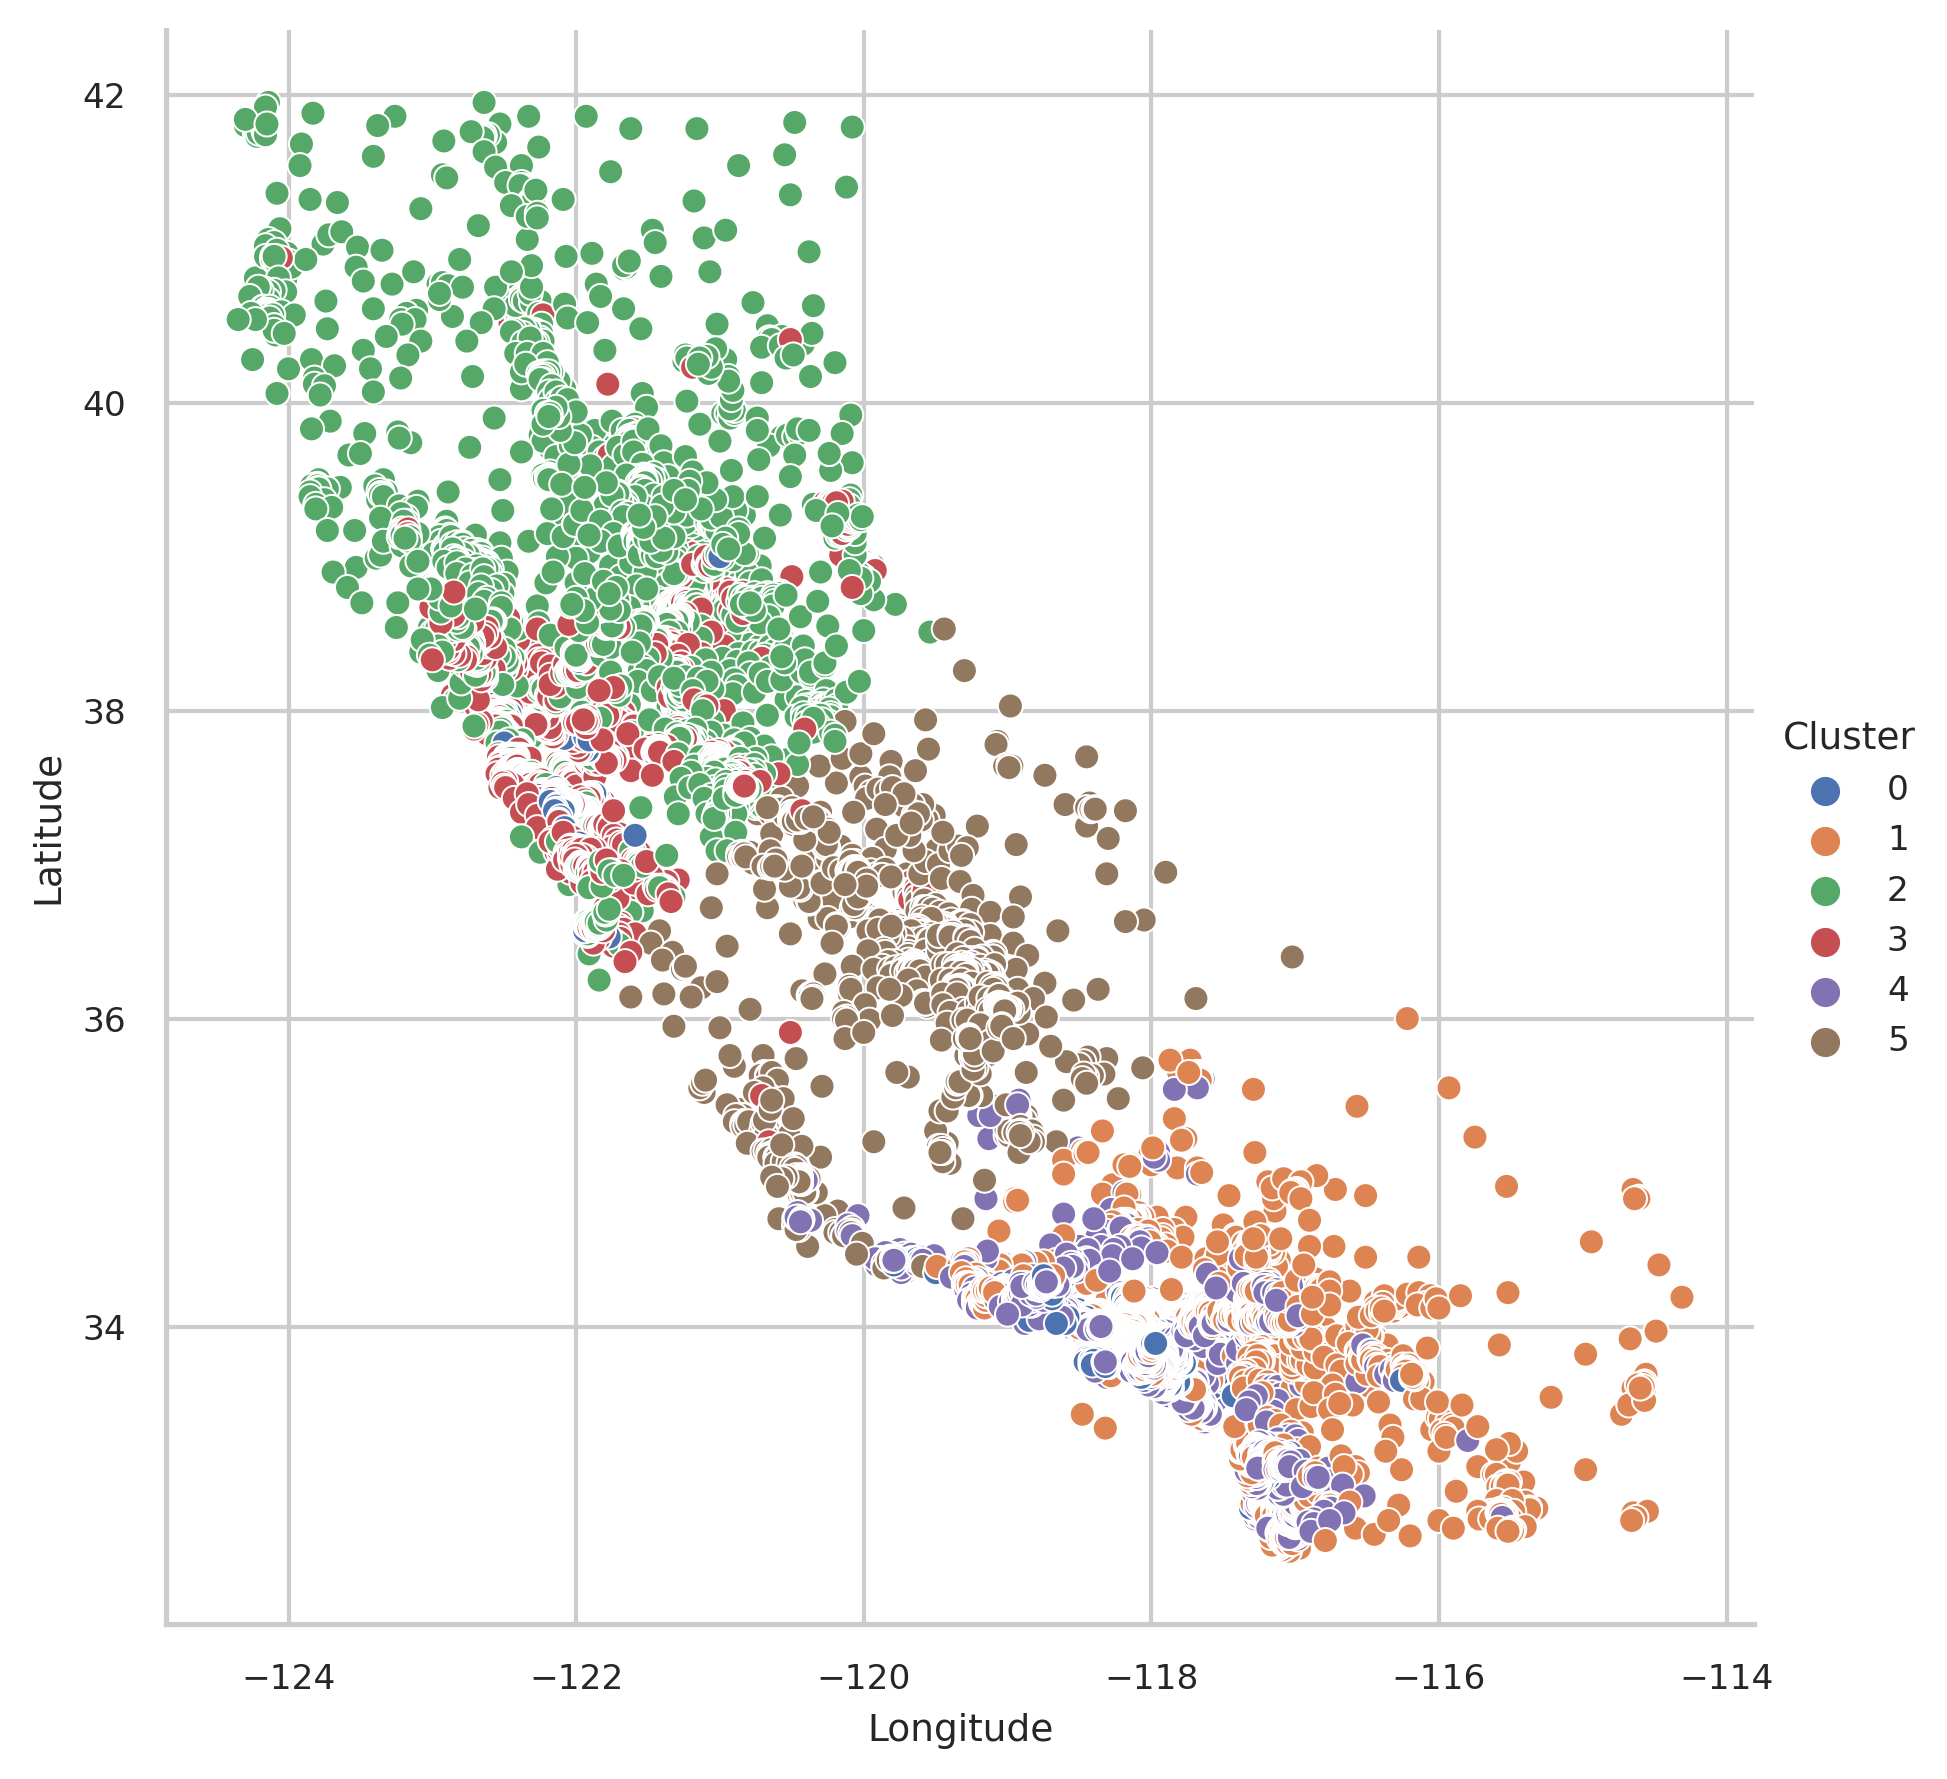

In [6]:
sns.relplot(data = X,
            x = 'Longitude', y = 'Latitude', hue = 'Cluster',
            height = 6)

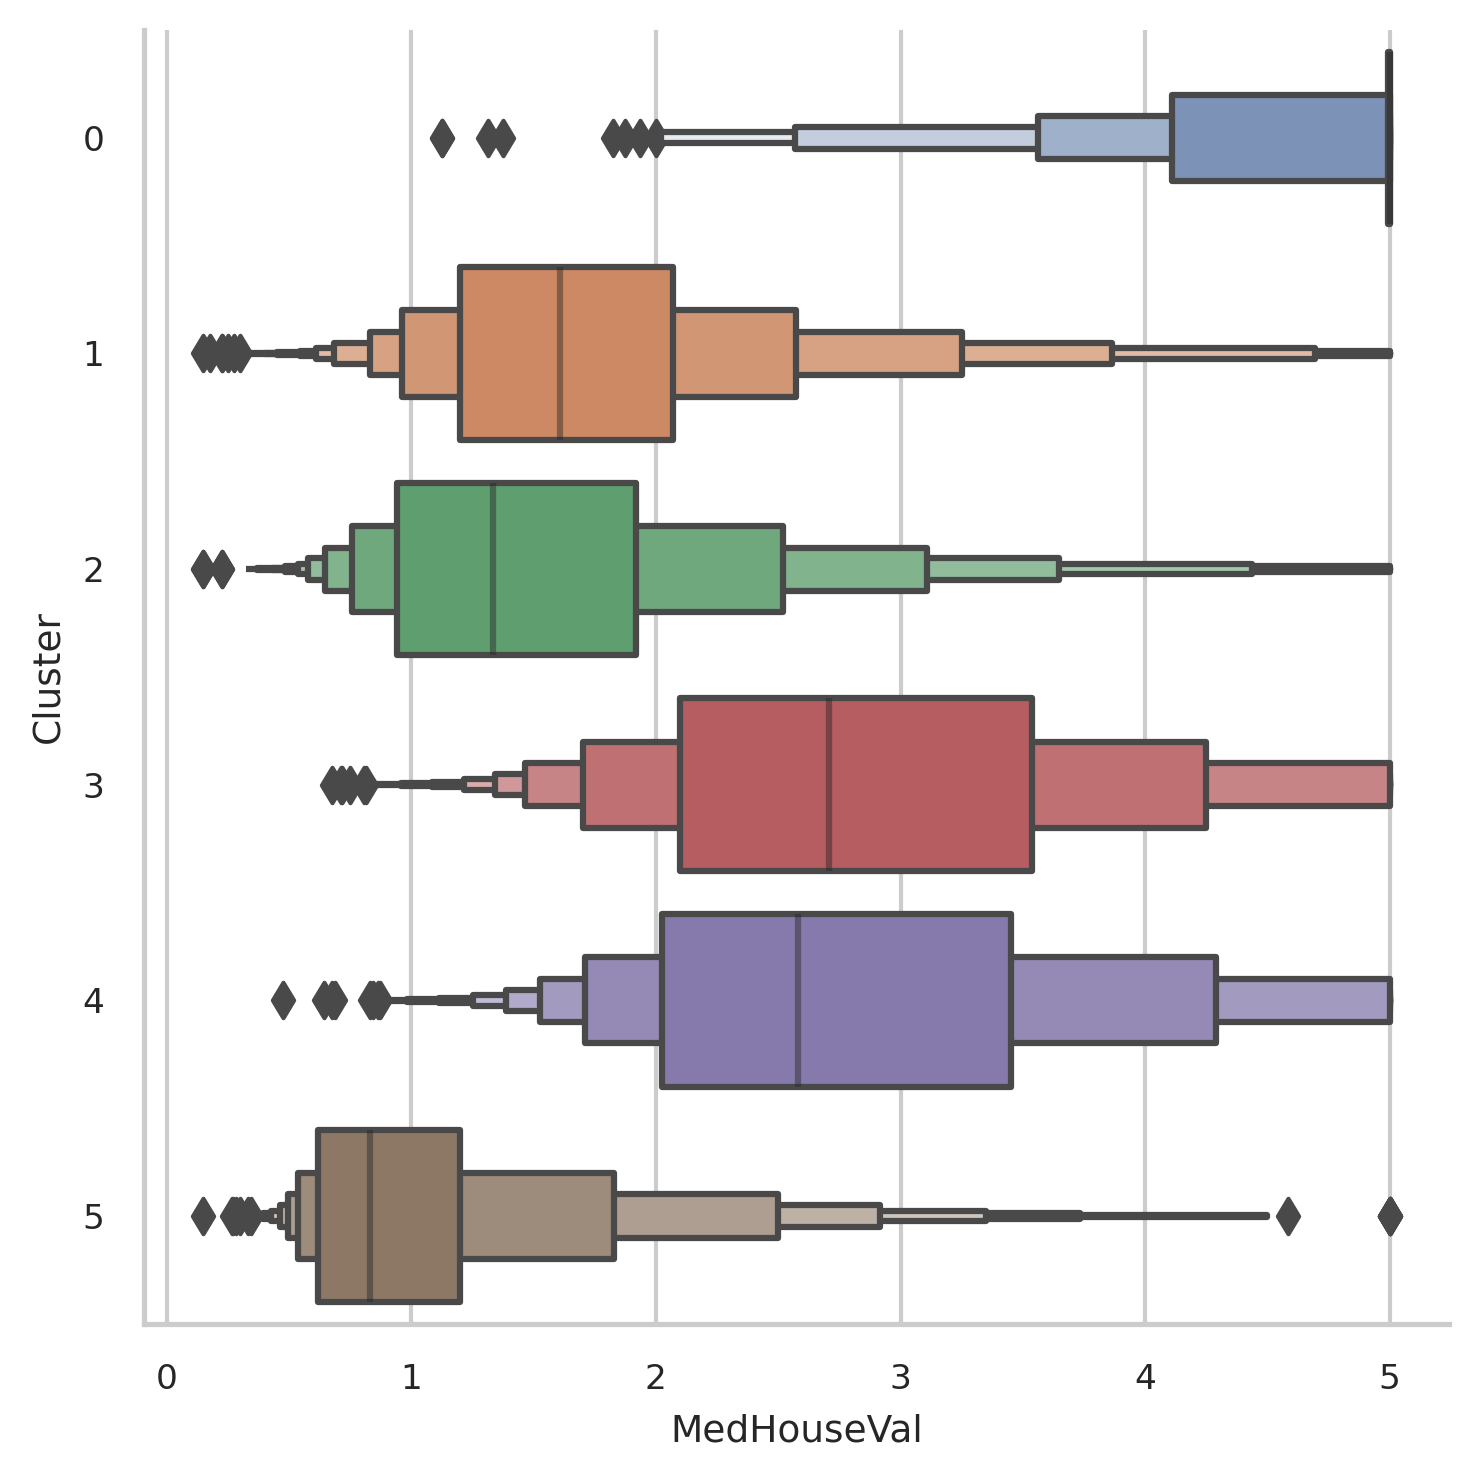

In [7]:
X['MedHouseVal'] = df['MedHouseVal']

sns.catplot(
    data = X,
    x = 'MedHouseVal', y = 'Cluster', kind = 'boxen'        
)

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

def score_dataset(X, y, model = XGBRegressor()):
    for colname in X.select_dtypes(['category', 'object']):
        X[colname], _ = X[colname].factorize()
        
    score = cross_val_score(
        model, X, y, cv = 5, scoring = 'neg_mean_squared_log_error',
    )
    
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

df = pd.read_csv('./data/ames.csv')

In [9]:
X = df.copy()
y = X.pop('SalePrice')

In [11]:
features = ['LotArea', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'GrLivArea']

X_scaled = X[features]
X_scaled = (X_scaled - X_scaled.mean(axis = 0)) / X_scaled.std(axis = 0)

In [13]:
kmeans = KMeans(
    n_clusters = 10, n_init = 10, random_state = 0,
)

X['Cluster'] = kmeans.fit_predict(X_scaled)

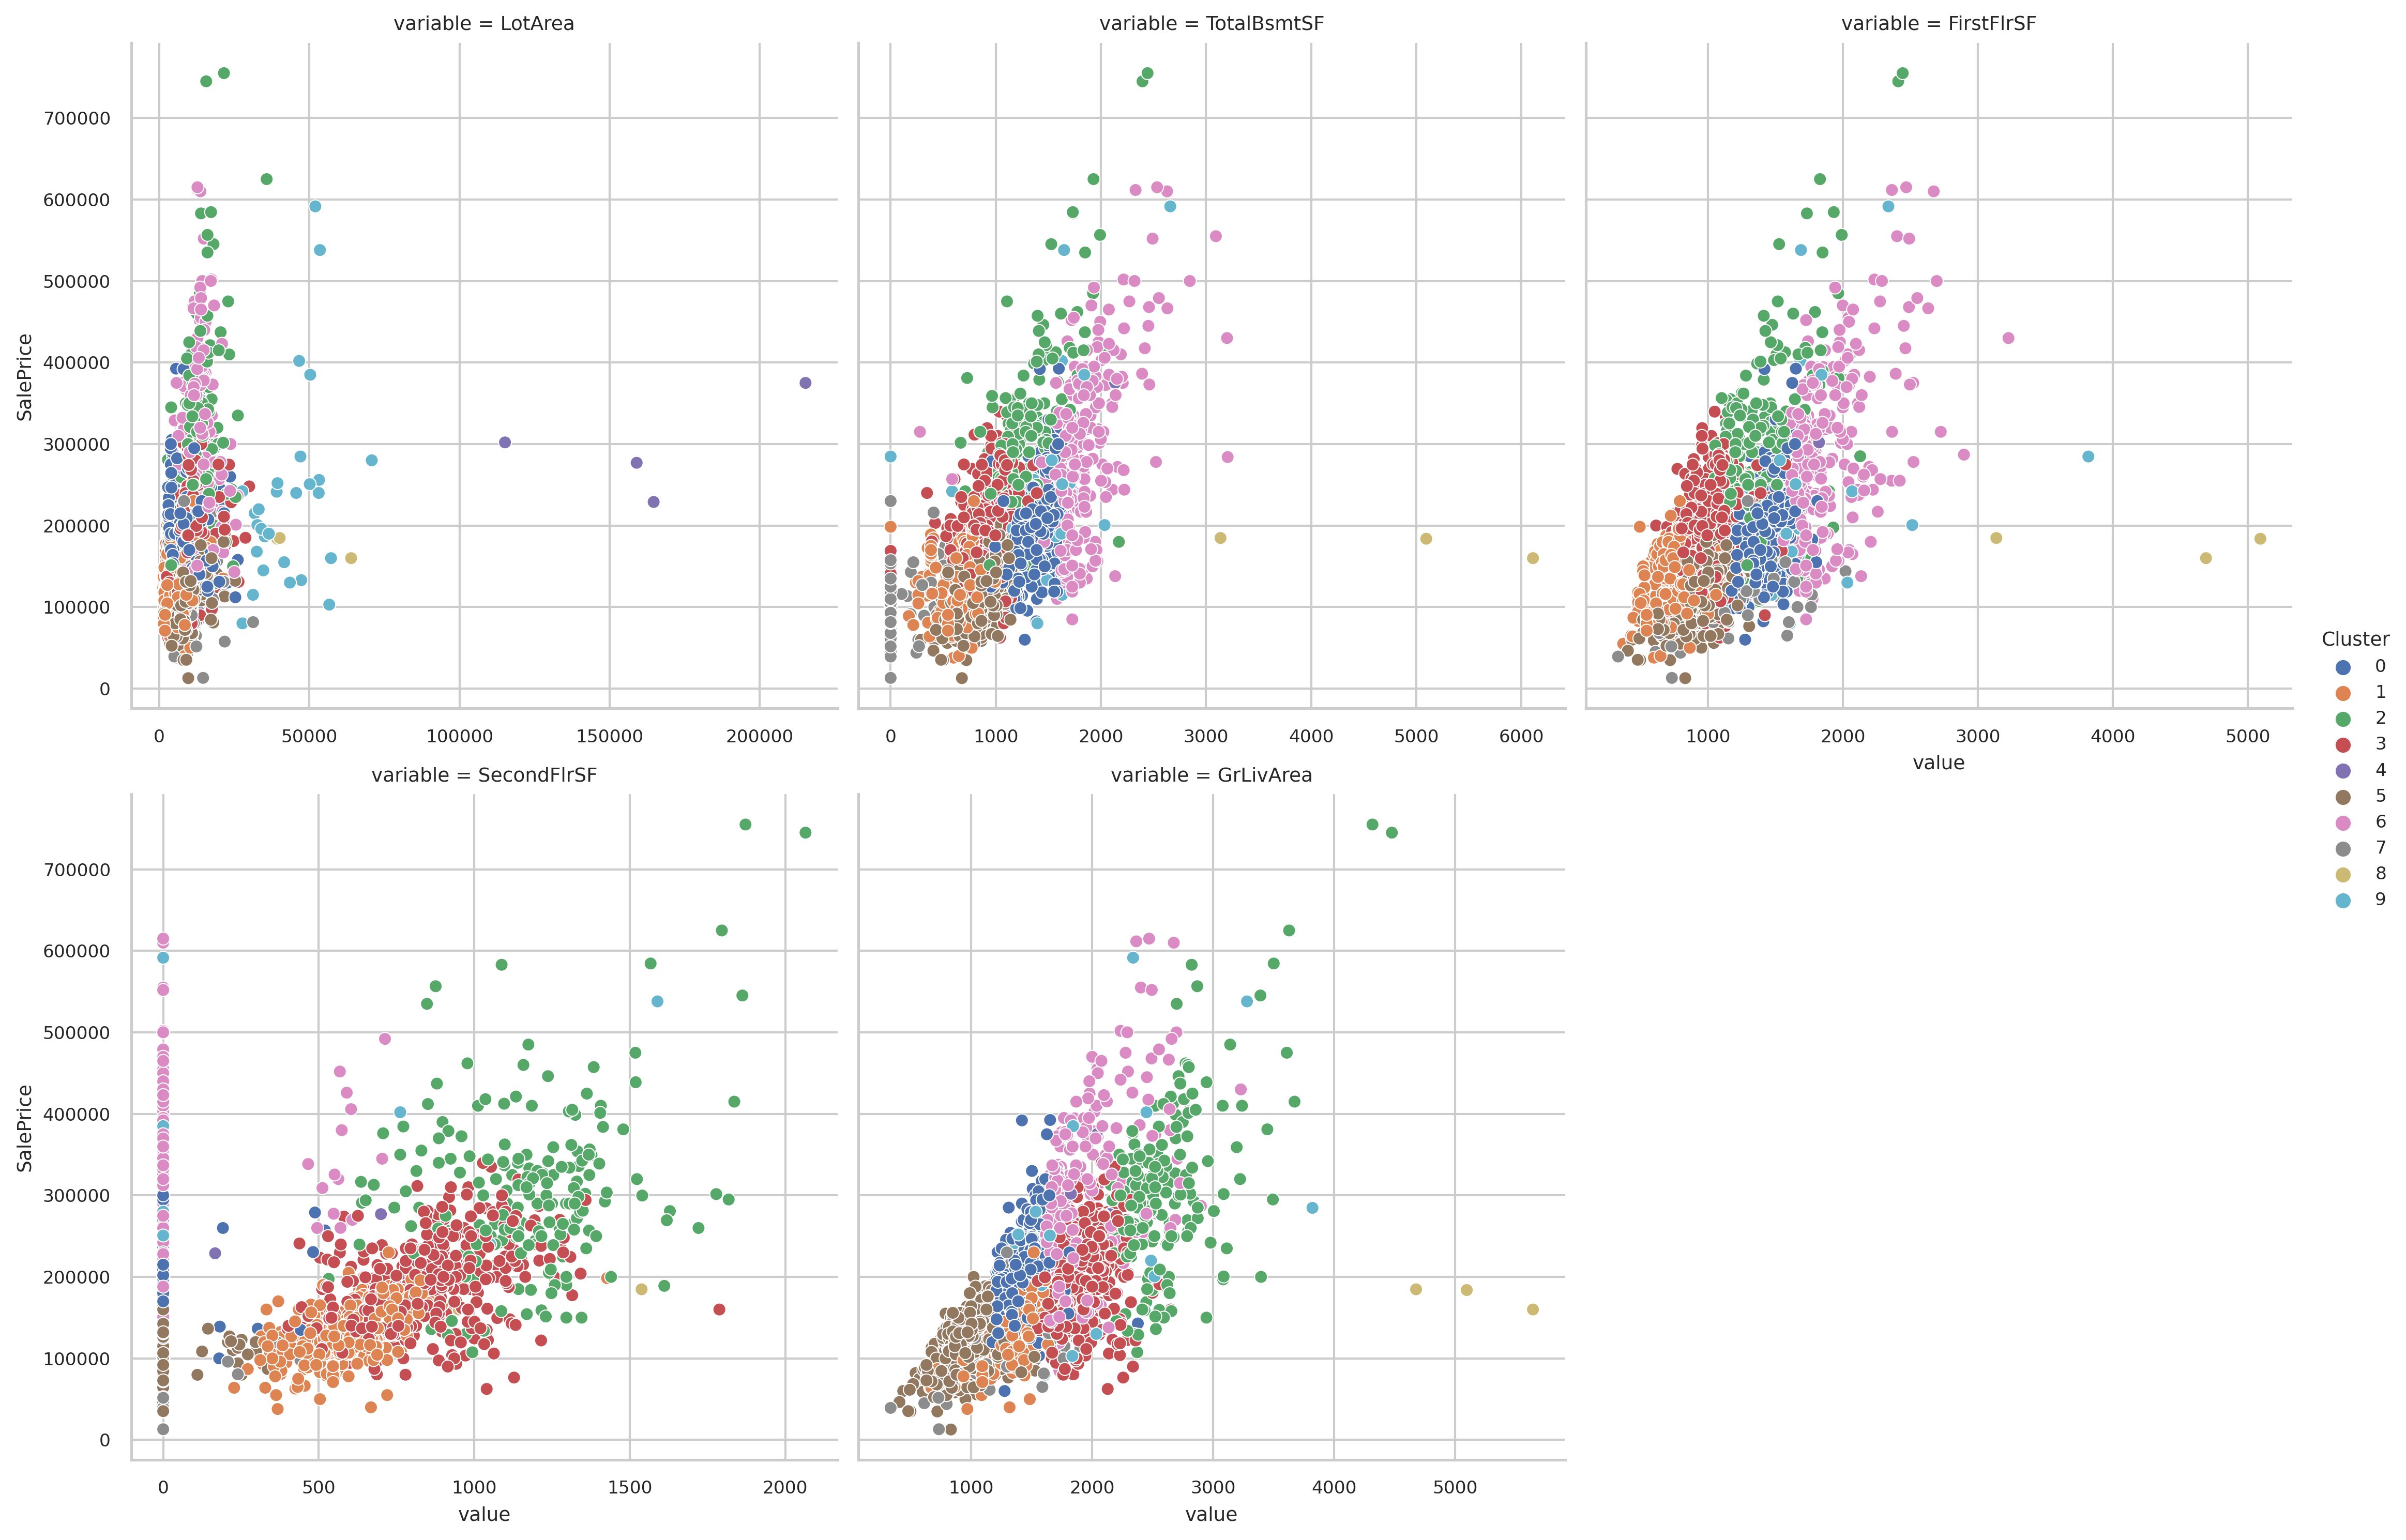

In [14]:
Xy = X.copy()
Xy['Cluster'] = Xy['Cluster'].astype('category')
Xy['SalePrice'] = y

sns.relplot(
    data = Xy.melt(
        value_vars = features, id_vars = ['SalePrice', 'Cluster'],
    ), x = 'value', y = 'SalePrice', hue = 'Cluster', col = 'variable',
    facet_kws = {'sharex': False}, col_wrap = 3,
)

In [15]:
score_dataset(X, y)

0.14046321396663294

In [17]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)

X_cd = kmeans.fit_transform(X[features])

X_cd = pd.DataFrame(X_cd, columns = [f"Centroid_{i}" for i in range(X_cd.shape[1])])
X_cd.head()

,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9
0,17304.708894,23964.427671,183478.825920,3584.110924,21109.803561,130061.738324,28164.710383,21622.988563,83381.239245,10306.263986
1,3090.962016,3840.016384,203633.243467,23711.808907,1300.806398,150214.930409,8016.053903,41793.919436,103538.114808,9952.496519
2,642.049580,6474.652929,200982.107241,21029.318130,3636.162647,147565.215074,10668.453842,39121.834148,100884.917455,7262.691944
3,3507.707770,3801.697821,204085.028488,24121.227589,1563.423503,150673.156839,7782.560632,42210.200255,103990.835183,10394.180679
4,976.740325,6035.104647,201423.301043,21478.372002,3197.147852,148002.851516,10224.934365,39564.723302,101328.096933,7687.204118


In [19]:
X = X.join(X_cd)

ValueError: columns overlap but no suffix specified: Index(['Centroid_0', 'Centroid_1', 'Centroid_2', 'Centroid_3', 'Centroid_4',
       'Centroid_5', 'Centroid_6', 'Centroid_7', 'Centroid_8', 'Centroid_9'],
      dtype='object')

In [20]:
score_dataset(X, y)

0.14044655388660574